In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Input, Dense

In [14]:
# Load the data
data = pd.read_csv('552_Mixed.csv')

In [15]:
# Initialize variables
N = len(data['Voltage']) # number of data points
SOC = np.zeros(N) # state of charge
SOC[0] = 1.0 # initial state of charge
Q = 3600 # battery capacity in Coulombs
IR = 0.5 # internal resistance of the battery in Ohms

In [16]:
# Coulomb counting method
for i in range(1, N):
    dt = 1 # time difference assumed to be 1 second
    coulombs = (data['Current'][i] + data['Current'][i-1])/2*dt/Q # average current
    SOC[i] = SOC[i-1] - coulombs + IR*data['Current'][i]/Q

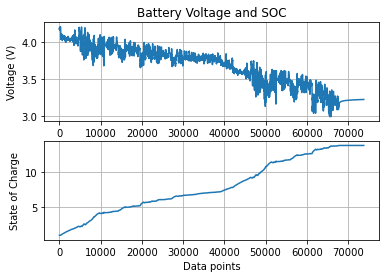

In [17]:
    
# Plot results
plt.subplot(2,1,1)
plt.plot(data['Voltage'])
plt.ylabel('Voltage (V)')
plt.title('Battery Voltage and SOC')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(SOC)
plt.xlabel('Data points')
plt.ylabel('State of Charge')
plt.grid(True)
plt.show()